# Pytorch Test Youtube Tensor Board Support
Notebook for following along with Pytorch model building, using [Pytorch](https://pytorch.org/tutorials/beginner/introyt/tensorboardyt_tutorial.html) website tutorial. This notebook will be similar to the previous Pytorch Test notebooks, as the [youtube content](https://www.youtube.com/watch?v=6CEld3hZgqc) covers similiar works.

### Choices for data

<br>

### Libaries and Modules
Importing the necessary libaries and modules for the notebook.

In [1]:
#Import cell
import matplotlib as mpl
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math
import numpy as np
import pandas as pd
import pickle as pk
import torch
import torchvision

import torch.functional as F
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.tensorboard import SummaryWriter

print("Imports complete")

Imports complete


<br>

### Importing and preparing data sets
Importing and preparing the data for the models.

In [2]:
#Gather datasets and prepare them for consumption
transform = transforms.Compose([ 
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])

In [3]:
#Importing data sets
training_set = torchvision.datasets.FashionMNIST('./data',
                                                download=True,
                                                train=True,
                                                transform=transform)

validation_set = torchvision.datasets.FashionMNIST('./data',
                                                   download=True,
                                                   train=False,
                                                   transform=transform)
print("Data sets successfully imported.")

Data sets successfully imported.


In [4]:
training_loader = torch.utils.data.DataLoader(training_set,
                                             batch_size=4,
                                             shuffle=True,
                                             num_workers=2)

validation_loader = torch.utils.data.DataLoader(validation_set,
                                               batch_size=4,
                                               shuffle=4,
                                               num_workers=2)

classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

In [5]:
#Setting seed value
torch.manual_seed(1247)

<br>

### Class Definitions
<b>Classes:</b><br>
<ul>
<li>
</ul>

In [6]:
#Class definition cell
    
print("Classes defined.")

Classes defined.


<br>

### Calculation functions
<b>Functions:</b><br>
<ul>
    <li></li>
</ul>

In [7]:
#Calculation functions cell

print("Calculation functions defined.")

Calculation functions defined.


<br>

### Plotting functions
<b>Functions:</b>
<ul>
    <li><b>matplotlib_imshow</b> - shows given images.</li>
</ul>

In [8]:
#Plotting functions Cell
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img/2 + 0.5 #unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

print("Plotting functions defined.")

Plotting functions defined.


<br>

### Main code
#### Showing Images in TensorBoard
We start by adding sample images from our dataset to TensorBoard

Bag
T-shirt/top
Bag
Dress


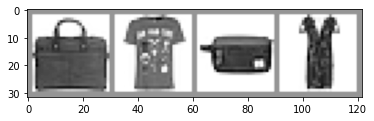

In [9]:
dataiter = iter(training_loader) #Extract a batch of 4 images
images, labels = dataiter.next()

img_grid = torchvision.utils.make_grid(images)
matplotlib_imshow(img_grid, one_channel=True)
for label in labels:
    print(classes[label])

In [10]:
writer = SummaryWriter('runs/fashion_mnist_experiment_1')

#Write image data to TensorBoard log dir
writer.add_image('Four Fashion-MNIST Images', img_grid) 
writer.flush()

To view, start TensorBoard on the command line with: `tensorboard --logdir=runs` and open and borwser tab to http://localhost:6006/.

<br>